In [78]:
from keras import models
from keras import layers
from pprint import pprint
import matplotlib.pyplot as plt

In [26]:
from keras.datasets import reuters
num_words=10000
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=num_words)

retures_index={v:k for (k,v) in reuters.get_word_index().items()}

def print_a_sample(sample):
    print(train_data[sample])
    
    wire=' '.join([retures_index[i] for i in train_data[sample]])
    print(wire)
    print(train_labels[sample])
    
print_a_sample(1)

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs
4


In [112]:
import numpy as np
from keras.utils import to_categorical

def vectorise_word_index(dataset):
    v=np.zeros((len(dataset),num_words)).astype("int8")
    
    for i,x in enumerate(dataset):
        v[i,x]=1
    print("Shape:{0} Size:{1} MB".format(v.shape,round(v.nbytes/(1024^2),2)))
    return v
    
x_train=vectorise_word_index(train_data)
x_test=vectorise_word_index(test_data)

y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)
print(np.asarray(y_train).shape)

Shape:(8982, 10000) Size:87543.86 MB
Shape:(2246, 10000) Size:21890.84 MB
(8982, 46)


In [138]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(num_words,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [134]:
history=model.fit(x_train[1000:]
                  ,y_train[1000:]
                  ,epochs=30
                  ,batch_size=512
                  ,validation_data=(x_train[:1000],y_train[:1000]))


Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 1s 137us/step - loss: 2.5954 - acc: 0.5291 - val_loss: 1.7635 - val_acc: 0.6300
Epoch 2/30
7982/7982 [==============================] - 1s 93us/step - loss: 1.4437 - acc: 0.6879 - val_loss: 1.3240 - val_acc: 0.7000
Epoch 3/30
7982/7982 [==============================] - 1s 94us/step - loss: 1.0679 - acc: 0.7633 - val_loss: 1.1388 - val_acc: 0.7440
Epoch 4/30
7982/7982 [==============================] - 1s 93us/step - loss: 0.8370 - acc: 0.8216 - val_loss: 1.0466 - val_acc: 0.7870
Epoch 5/30
7982/7982 [==============================] - 1s 93us/step - loss: 0.6622 - acc: 0.8608 - val_loss: 0.9572 - val_acc: 0.7990
Epoch 6/30
7982/7982 [==============================] - 1s 94us/step - loss: 0.5283 - acc: 0.8884 - val_loss: 0.9189 - val_acc: 0.8030
Epoch 7/30
7982/7982 [==============================] - 1s 92us/step - loss: 0.4259 - acc: 0.9113 - val_loss: 0.8869 - val_acc: 0.8150
Epoch 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


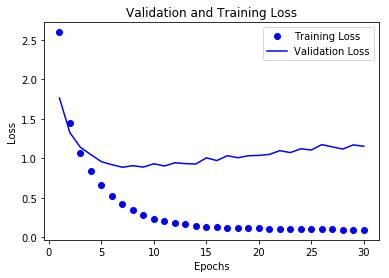

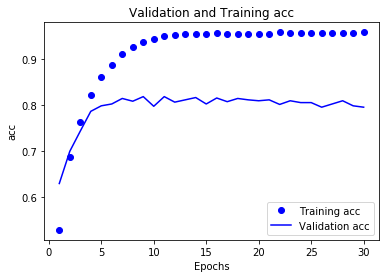

2246/2246 [==============================] - 0s 109us/step
[1.3234203113367382, 0.7782724844698171]


In [135]:
def plot_train_history(history):
    h_dict=history.history
    print(h_dict.keys())
    epochs=range(1,len(h_dict['acc'])+1)
    
    plt.plot(epochs,h_dict['loss'],'bo',label='Training Loss')
    plt.plot(epochs,h_dict['val_loss'],'b',label='Validation Loss')
    plt.title('Validation and Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(epochs,h_dict['acc'],'bo',label='Training acc')
    plt.plot(epochs,h_dict['val_acc'],'b',label='Validation acc')
    plt.title('Validation and Training acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

plot_train_history(history)
results=model.evaluate(x_test,y_test);
print(results)

history_full=model.fit(x_train
                  ,y_train
                  ,epochs=9
                  ,batch_size=512)

In [143]:
predictions=model.predict(x_test)
results=model.evaluate(x_test,y_test)
print(results)

2246/2246 [==============================] - 0s 107us/step
[0.9700014158114725, 0.7876224398931434]


In [148]:
sample=536
print(predictions[sample])
print(predictions[sample].sum())
print(predictions[sample].argmax())
print(y_test[sample].argmax())

[1.21252313e-04 9.88318352e-04 6.36975921e-04 9.77148414e-01
 4.02513100e-03 1.96070818e-04 2.74832528e-05 1.28945932e-04
 7.53457134e-04 1.60393189e-04 1.16421259e-03 1.66476797e-03
 6.30528375e-04 1.88519363e-04 1.75667941e-04 2.81471439e-04
 1.16597710e-03 2.42484632e-04 7.65652658e-05 1.34896371e-03
 3.25186923e-03 1.83819997e-04 7.75807566e-05 6.57864555e-04
 3.74128314e-04 4.04674392e-05 5.96278369e-05 2.50440702e-04
 3.52659816e-04 2.10282873e-04 1.76439600e-04 5.27746917e-04
 1.55141697e-05 5.44685536e-05 4.82906733e-04 1.56963928e-04
 7.92309176e-04 1.82733012e-04 2.18726127e-04 1.08762666e-04
 1.27334701e-04 1.68198691e-04 6.58286881e-05 5.40906731e-05
 2.61930600e-05 2.57005915e-04]
0.99999946
3
3
